In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

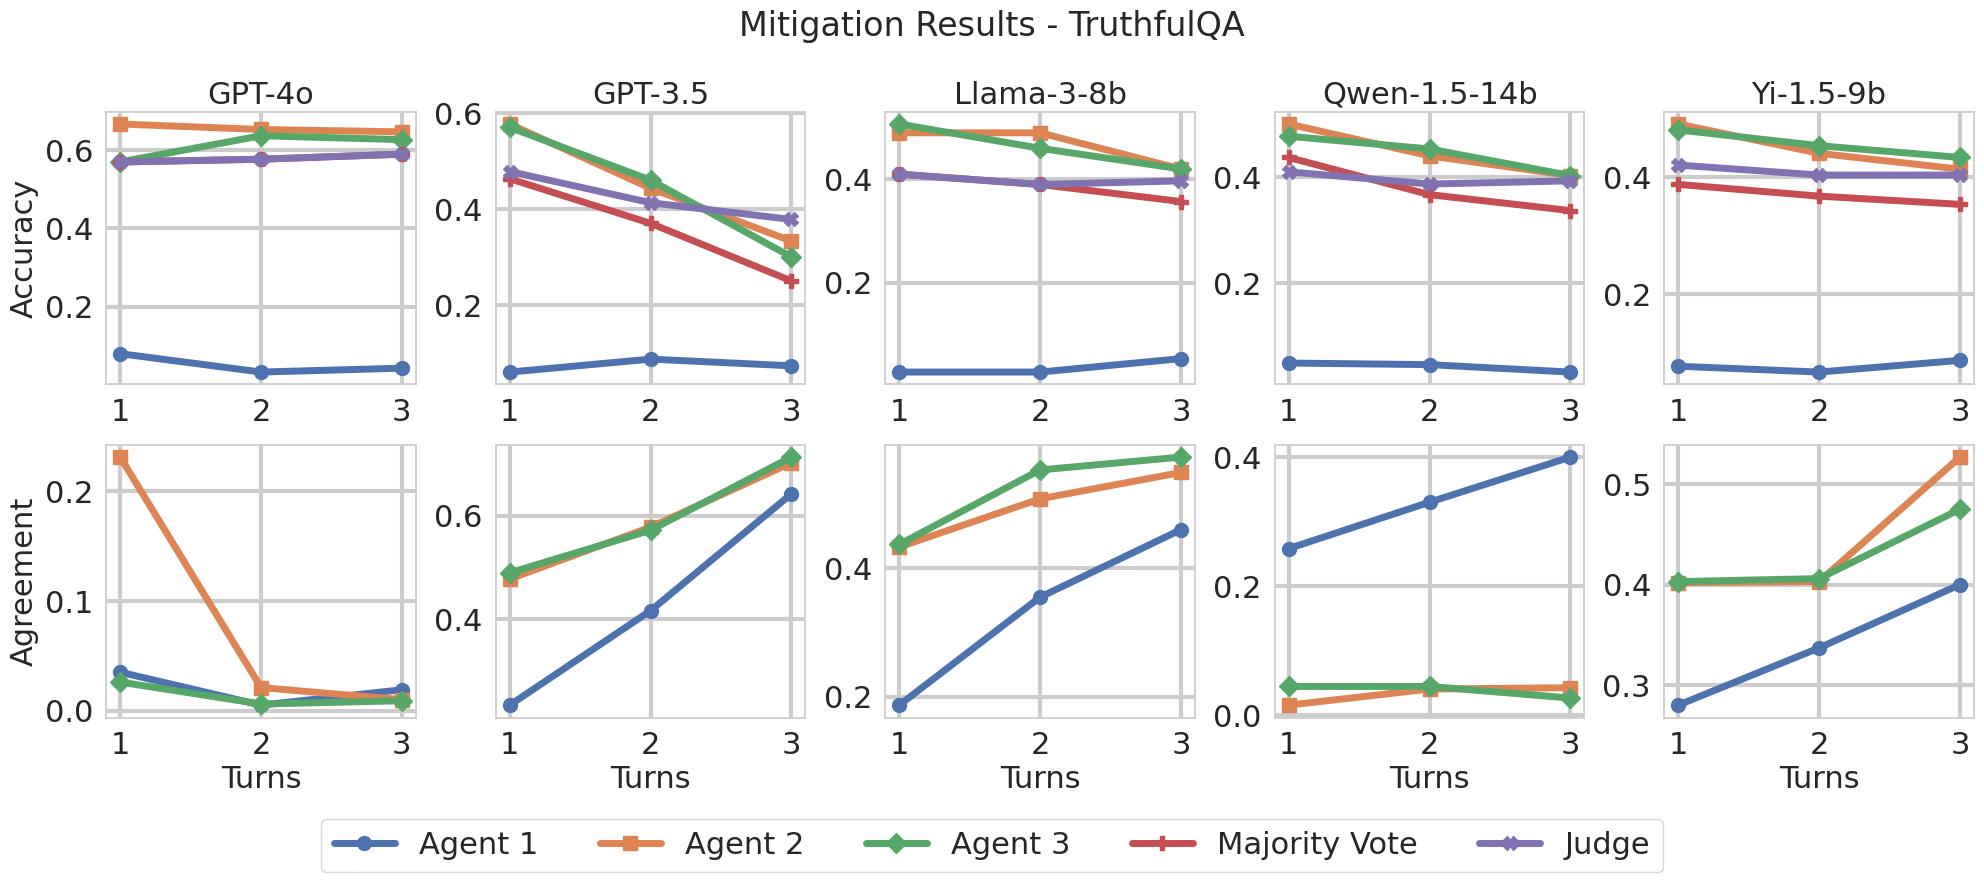

In [32]:
# Adjusting the data dictionary to ensure all lists have the same length
data = {
"Group": ["GPT-4o"] * 3 + ["GPT-3.5"] * 3 + ["Llama-3-8b"] * 3 + ["Qwen-1.5-14b"] * 3 + ["Yi-1.5-9b"] * 3,
"Turns": [1, 2, 3] * 5,
"Accuracy_Agent1": [0.08, 0.033, 0.043, 0.06, 0.087, 0.073, 0.027, 0.027, 0.053, 0.05, 0.047, 0.033, 0.077, 0.067, 0.087],
"Accuracy_Agent2": [0.667, 0.653, 0.647, 0.577, 0.443, 0.333, 0.49, 0.49, 0.42, 0.5, 0.44, 0.403, 0.49, 0.44, 0.413],
"Accuracy_Agent3": [0.57, 0.637, 0.627, 0.57, 0.46, 0.3, 0.507, 0.46, 0.42, 0.477, 0.453, 0.403, 0.48, 0.453, 0.433],
"Accuracy_Majority": [0.57, 0.577, 0.59, 0.463, 0.37, 0.25, 0.41, 0.39, 0.357, 0.437, 0.367, 0.337, 0.387, 0.367, 0.353],
"Accuracy_Judge": [0.57, 0.577, 0.59, 0.478, 0.413, 0.378, 0.41, 0.39, 0.397, 0.41, 0.387, 0.393, 0.42, 0.403, 0.403],
"Agreement_Agent1": [0.035, 0.005, 0.019, 0.235, 0.417, 0.642, 0.187, 0.355, 0.46, 0.258, 0.33, 0.4, 0.28, 0.337, 0.4],
"Agreement_Agent2": [0.231, 0.021, 0.01, 0.478, 0.578, 0.702, 0.433, 0.508, 0.549, 0.015, 0.04, 0.042, 0.402, 0.403, 0.527],
"Agreement_Agent3": [0.026, 0.006, 0.009, 0.49, 0.572, 0.713, 0.437, 0.553, 0.573, 0.044, 0.044, 0.026, 0.403, 0.406, 0.475],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Function to set the parameters correctly without using invalid keys
def set_params():
    sns.set_theme(style="whitegrid")
    plt.rcParams.update({
        'lines.markersize': 10,
        'lines.linewidth': 5,
        'grid.linewidth': 3,
        'axes.labelsize': 22,
        'xtick.labelsize': 22,
        'ytick.labelsize': 22,
    })

# Adjusted function to plot the results without lines of best fit
def plot_results_without_fit(df):
    set_params()
    
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 7.5))
    groups = df['Group'].unique()
    markers = ['o', 's', 'D', 'P', 'X']
    
    for i, group in enumerate(groups):
        group_data = df[df['Group'] == group]
        turns = group_data['Turns']
        
        # Accuracy plots
        axes[0, i].plot(turns, group_data['Accuracy_Agent1'], marker=markers[0], label='Agent 1')
        axes[0, i].plot(turns, group_data['Accuracy_Agent2'], marker=markers[1], label='Agent 2')
        axes[0, i].plot(turns, group_data['Accuracy_Agent3'], marker=markers[2], label='Agent 3')
        axes[0, i].plot(turns, group_data['Accuracy_Majority'], marker=markers[3], label='Majority Vote')
        axes[0, i].plot(turns, group_data['Accuracy_Judge'], marker=markers[4], label='Judge')
        axes[0, i].set_title(f'{group}', fontsize=22)
        # axes[0, i].set_xlabel('Turns', fontsize=22)
        
        # Agreement plots
        axes[1, i].plot(turns, group_data['Agreement_Agent1'], marker=markers[0], label='Agent 1')
        axes[1, i].plot(turns, group_data['Agreement_Agent2'], marker=markers[1], label='Agent 2')
        axes[1, i].plot(turns, group_data['Agreement_Agent3'], marker=markers[2], label='Agent 3')
        axes[1, i].set_xlabel('Turns', fontsize=22)
        
        if i == 0:
            axes[0, i].set_ylabel('Accuracy', fontsize=22)
            axes[1, i].set_ylabel('Agreement', fontsize=22)
            # axes[0, i].legend(fontsize=16)
            # axes[1, i].legend(fontsize=16)

    plt.tight_layout()
    # Add legends at the bottom of each row
    handles, labels = axes[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', 
               ncol=5, fontsize=22, bbox_to_anchor=(0.5, -0.10))
    
    fig.suptitle('Mitigation Results - TruthfulQA', 
                 fontsize=24, y=1.07)
    plt.show()
    # figure title

plot_results_without_fit(df)
